In [1]:
#Creating Hidden Markov Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
states = ['sleeping','eating','walking']

pi = [0.45,0.35,0.2]

state_space = pd.Series(pi , index = states, name = 'states')

print(state_space)
print(state_space.sum())

sleeping    0.45
eating      0.35
walking     0.20
Name: states, dtype: float64
1.0


In [4]:
state_space['eating']

0.35

In [5]:
q_df = pd.DataFrame(columns=states, index=states)

q_df.loc[states[0]] = [0.40,0.20,0.40]
q_df.loc[states[1]] = [0.40,0.40,0.20]
q_df.loc[states[2]] = [0.40,0.20,0.40]

In [6]:
q_df

,sleeping,eating,walking
sleeping,0.4,0.2,0.4
eating,0.4,0.4,0.2
walking,0.4,0.2,0.4


In [7]:
q_df.sum(axis=0)

sleeping    1.2
eating      0.8
walking     1.0
dtype: object

In [8]:
q_df.sum(axis='rows')

sleeping    1.2
eating      0.8
walking     1.0
dtype: object

In [9]:
q_df.sum(axis=1)

sleeping    1.0
eating      1.0
walking     1.0
dtype: float64

In [10]:
q_df.sum(axis='columns')q_df.sum(axis='rows')

sleeping    1.0
eating      1.0
walking     1.0
dtype: float64

In [11]:
from pprint import pprint

In [12]:
def get_markov_edges(Q):
    edge = dict()
    
    for col in Q.columns:
        
        for idx in Q.index:
            
            edge[(idx,col)] = Q.loc[idx,col]
    
    return edge

In [13]:
edge_wt = get_markov_edges(q_df)

pprint(edge_wt)

{('eating', 'eating'): 0.4,
 ('eating', 'sleeping'): 0.4,
 ('eating', 'walking'): 0.2,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'sleeping'): 0.4,
 ('sleeping', 'walking'): 0.4,
 ('walking', 'eating'): 0.2,
 ('walking', 'sleeping'): 0.4,
 ('walking', 'walking'): 0.4}


In [14]:
print(edge_wt)

{('sleeping', 'sleeping'): 0.4, ('eating', 'sleeping'): 0.4, ('walking', 'sleeping'): 0.4, ('sleeping', 'eating'): 0.2, ('eating', 'eating'): 0.4, ('walking', 'eating'): 0.2, ('sleeping', 'walking'): 0.4, ('eating', 'walking'): 0.2, ('walking', 'walking'): 0.4}


<b><u> Creating object of the graphs

In [15]:
Graph = nx.MultiDiGraph()

In [16]:
# Add states to graph
Graph.add_nodes_from(states)
print(f'Nodes: {Graph.nodes}')

Nodes: ['sleeping', 'eating', 'walking']


In [17]:
for key , val in edge_wt.items():
    
    tmp_origin , tmp_destination = key[0],key[1]
    
    Graph.add_edge(tmp_origin,tmp_destination, weight = val , label = val)
    
print('Edges:')
pprint(Graph.edges(data =True))

Edges:
OutMultiEdgeDataView([('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'walking', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('eating', 'eating', {'weight': 0.4, 'label': 0.4}), ('eating', 'walking', {'weight': 0.2, 'label': 0.2}), ('walking', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('walking', 'eating', {'weight': 0.2, 'label': 0.2}), ('walking', 'walking', {'weight': 0.4, 'label': 0.4})])


<b><u> Creating graph with pydot and graphviz

In [18]:
import pydot
import graphviz

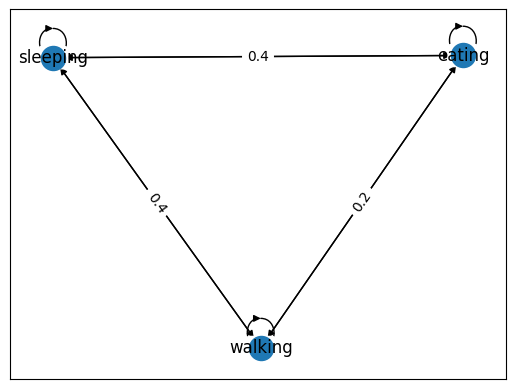

In [19]:
position = nx.drawing.nx_pydot.graphviz_layout(Graph)
nx.draw_networkx(Graph,position)

edge_labels = {(n1,n2): d['label'] for n1,n2,d in Graph.edges(data=True)}

nx.draw_networkx_edge_labels(Graph, position,edge_labels=edge_labels)

nx.drawing.nx_pydot.write_dot(Graph,'my_markov.dot')

<b><u> Hidden States

In [20]:
hidden_state = ['healthy', 'sick']

pi = [0.55,0.45]

state_space = pd.Series(pi , index = hidden_state, name = 'states')

print(state_space)
print(state_space.sum())

healthy    0.55
sick       0.45
Name: states, dtype: float64
1.0


In [21]:
a1_df = pd.DataFrame(columns=hidden_state, index=hidden_state)

a1_df.loc[hidden_state[0]] = [0.70,0.30]
a1_df.loc[hidden_state[1]] = [0.40,0.60]

In [22]:
a1_df

,healthy,sick
healthy,0.7,0.3
sick,0.4,0.6


In [25]:
a1_df.sum(axis='columns')

healthy    1.0
sick       1.0
dtype: float64

In [26]:
a1_df.sum(axis='rows')

healthy    1.1
sick       0.9
dtype: object

In [27]:
edge_wt = get_markov_edges(a1_df)

pprint(edge_wt)

{('healthy', 'healthy'): 0.7,
 ('healthy', 'sick'): 0.3,
 ('sick', 'healthy'): 0.4,
 ('sick', 'sick'): 0.6}


In [31]:
Graph = nx.MultiDiGraph()

In [32]:
# Add states to graph
Graph.add_nodes_from(hidden_state)
print(f'Nodes: {Graph.nodes}')

Nodes: ['healthy', 'sick']


In [33]:
for key , val in edge_wt.items():
    
    tmp_origin , tmp_destination = key[0],key[1]
    
    Graph.add_edge(tmp_origin,tmp_destination, weight = val , label = val)
    
print('Edges:')
pprint(Graph.edges(data =True))

Edges:
OutMultiEdgeDataView([('healthy', 'healthy', {'weight': 0.7, 'label': 0.7}), ('healthy', 'sick', {'weight': 0.3, 'label': 0.3}), ('sick', 'healthy', {'weight': 0.4, 'label': 0.4}), ('sick', 'sick', {'weight': 0.6, 'label': 0.6})])


<b><u> Creating graph with pydot and graphviz

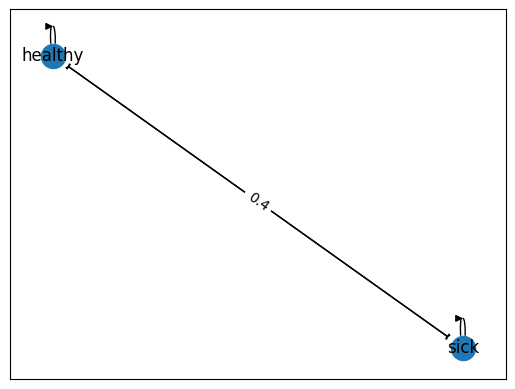

In [34]:
position = nx.drawing.nx_pydot.graphviz_layout(Graph)
nx.draw_networkx(Graph,position)

edge_labels = {(n1,n2): d['label'] for n1,n2,d in Graph.edges(data=True)}

nx.draw_networkx_edge_labels(Graph, position,edge_labels=edge_labels)

nx.drawing.nx_pydot.write_dot(Graph,'my_markov.dot')